In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")

df = pd.read_csv("top100videogamesales.csv")

# Regional Sales by Publisher
##### The x-axis represents the different publishers.
##### The y-axis represents the total sales (in millions) for each publisher.
##### Each bar is segmented into different colors representing sales in different regions: North America (NA_Sales), Europe (EU_Sales), Japan (JP_Sales), and other regions (Other_Sales).
##### The publisher with the most sales is 'Nintendo' with global sales of 653.18 million.

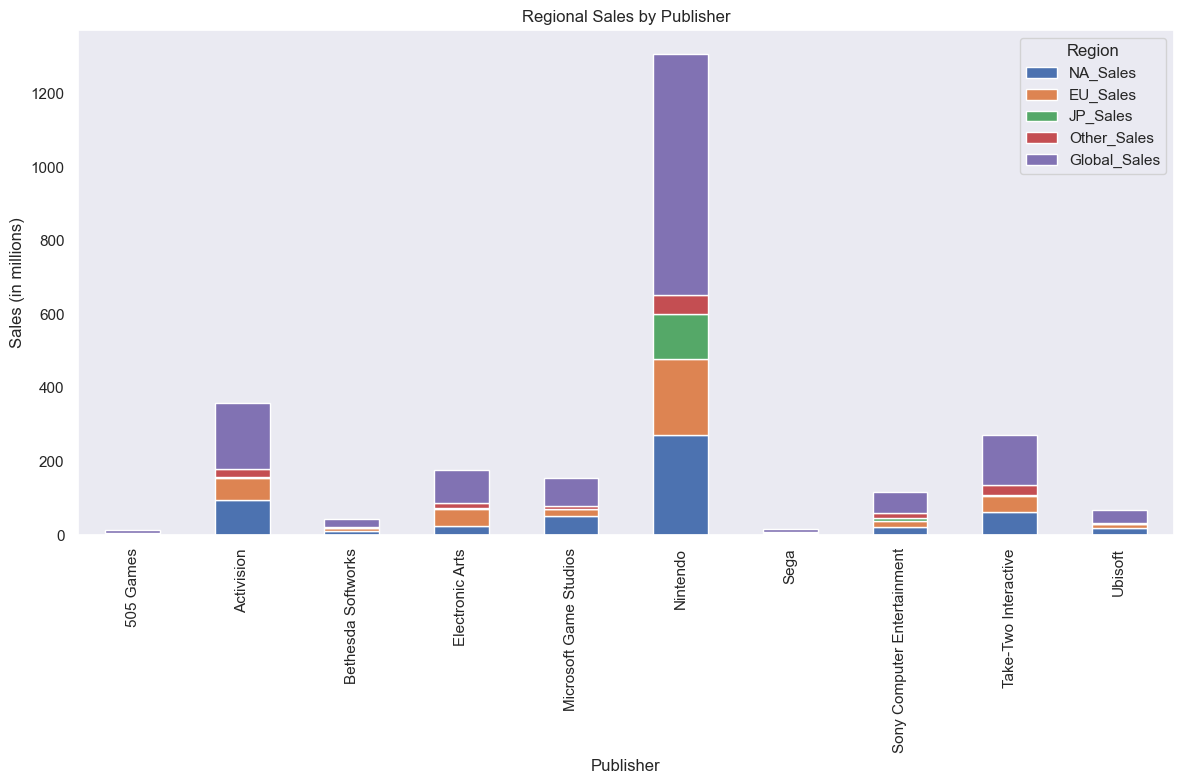

In [2]:
publisher_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

publisher_sales.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Regional Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [3]:
top_publisher = publisher_sales['Global_Sales'].idxmax()
top_sales = publisher_sales['Global_Sales'].max()

print(f"The publisher with the most sales is '{top_publisher}' with global sales of {top_sales:.2f} million.")

The publisher with the most sales is 'Nintendo' with global sales of 653.18 million.


# Global Sales by Year
##### The x-axis represents the years from 2000 to 2015.
##### The y-axis represents the total global sales (in millions) for each year.
##### Each point on the line represents the total global sales for a specific year.

#### The line chart shows the trend of total global sales of video games over the years 2000 to 2015. From the chart, you can observe the following:

##### • Peak total sales occured in 2006, due in large part to the success of Wii Sports. 
##### • After 2006 there is a negative trend through 2015. 
##### • The year with the lowest sales was 2003, followed by 2002.

##### This visualization provides insights into the overall trend of global video game sales over the specified time period, helping to understand the industry's performance and potential factors influencing sales fluctuations.

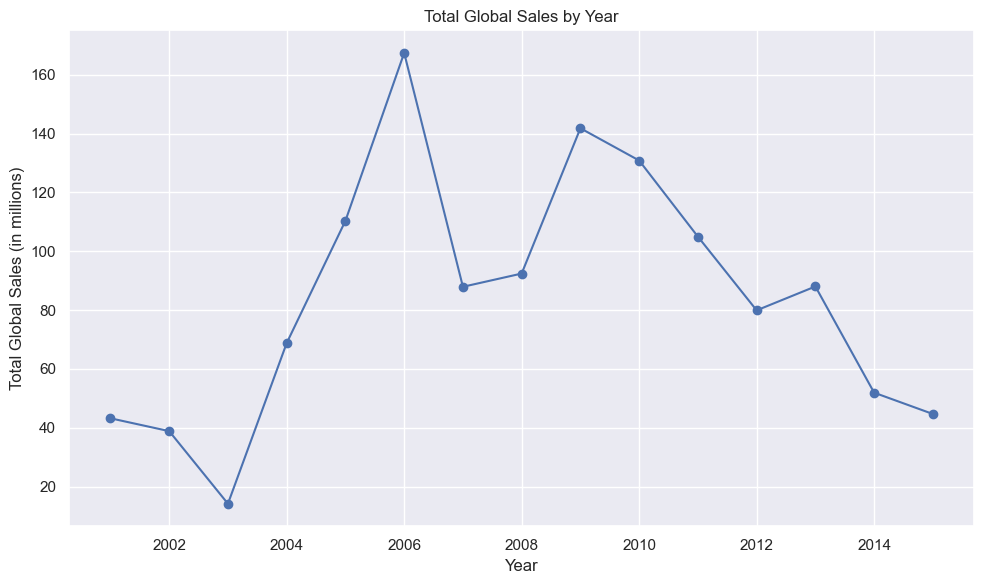

In [4]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-')
plt.title('Total Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(True)
plt.tight_layout()

plt.show()

# Global Sales Distribution for Action Games
##### The x-axis represents the range of global sales (in millions) for action games, divided into bins.
##### The y-axis represents the frequency of games falling into each bin.

#### The histogram shows the distribution of global sales for games with "Action" as the genre. From the chart, we can observe the following:

##### • The highest concentration between 6-9 million.
##### • As the global sales increase, the frequency of games decreases, indicating fewer games with very high global sales.

##### This visualization helps understand the distribution of global sales for action games, providing insights into the popularity and success of games in this genre.

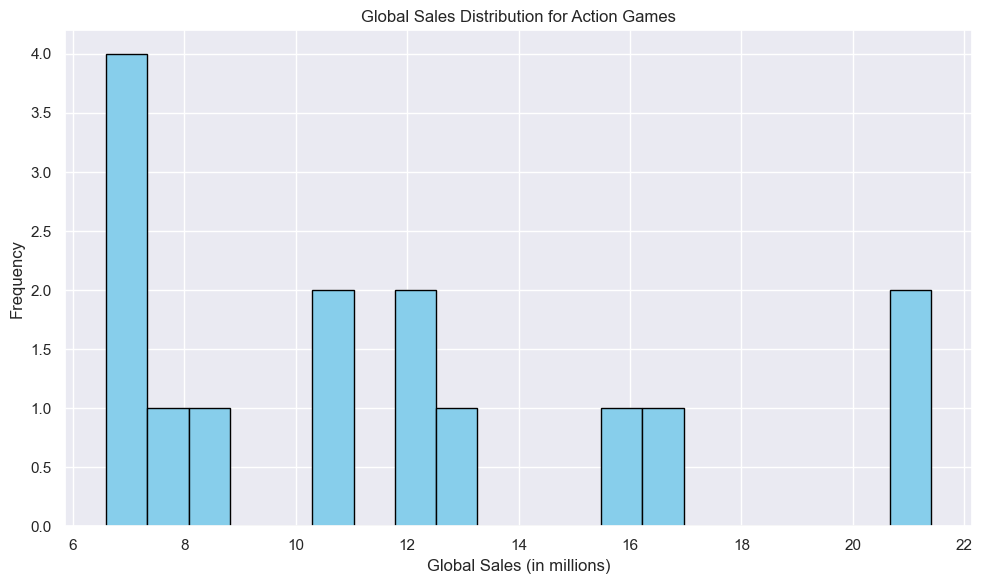

In [5]:
action_games = df[df['Genre'] == 'Action']

plt.figure(figsize=(10, 6))
plt.hist(action_games['Global_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Global Sales Distribution for Action Games')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()

# North American Sales by Genre
##### • Each slice of the pie chart represents the percentage of sales for a specific genre in the North American market.
##### • Genres with less than 6% of total sales are grouped together into an "Other" category to create a more readable chart.
##### • The "Other" category includes the combined sales of all these smaller genres.

##### The pie chart illustrates the distribution of sales by genre in the North American market. Each slice represents the proportion of total sales that a particular genre contributed. The larger slices represent genres with higher sales, while smaller slices represent genres with relatively lower sales. Genres with sales below 6% of the total are grouped together into the "Other" category, which combines their sales to provide a clearer representation of the dominant genres.

##### This visualization enables easy comparison of the relative popularity of different genres in the North American market, highlighting which genres contribute the most to total sales.

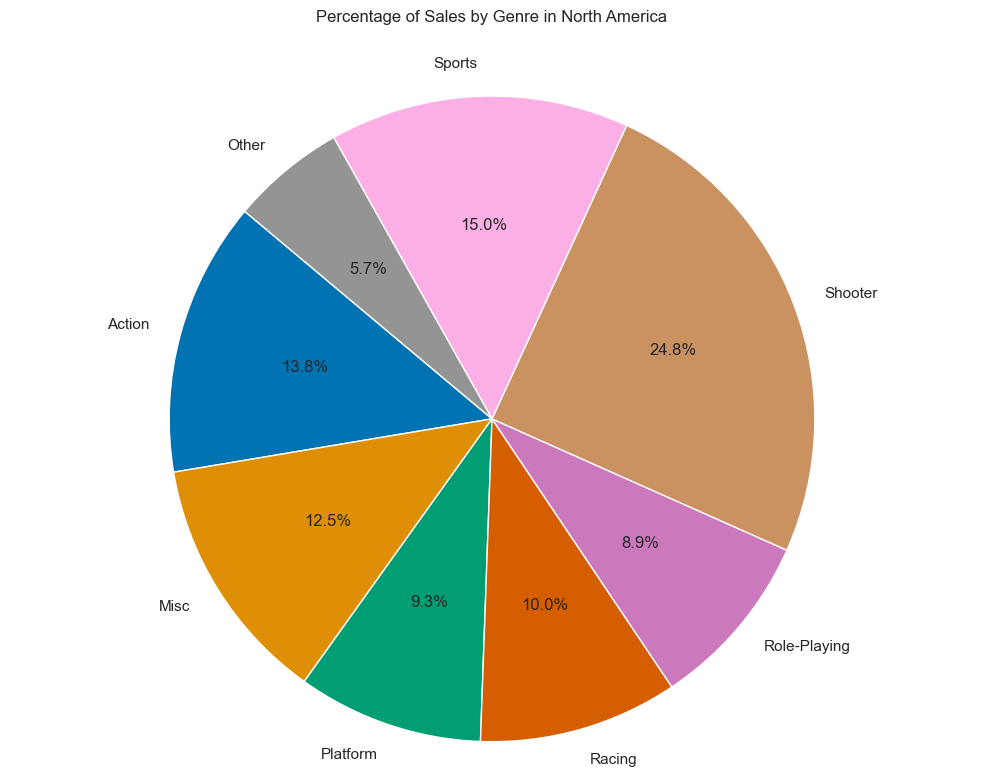

In [6]:
genre_sales_na = df.groupby('Genre')['NA_Sales'].sum()

threshold = 0.06 * genre_sales_na.sum()
other_genres = genre_sales_na[genre_sales_na < threshold]
other_sales = other_genres.sum()
genre_sales_na = genre_sales_na[genre_sales_na >= threshold]
genre_sales_na['Other'] = other_sales

colors = sns.color_palette("colorblind")

plt.figure(figsize=(10, 8))
plt.pie(genre_sales_na, labels=genre_sales_na.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Sales by Genre in North America', loc='center', pad=30)
plt.axis('equal')
plt.tight_layout()

plt.show()

###### European Sales by Genre
##### • The pie chart displays the percentage of sales for each genre in the European market.
##### • Genres with sales below 6% of the total are grouped together into an "Other" category, which combines their sales to provide a clearer representation of the dominant genres.
##### • The "Other" category includes the combined sales of all genres that individually contribute less than 6% to the total European market sales.

##### This visualization enables easy comparison of the relative popularity of different genres in the European market, highlighting which genres contribute the most to total sales while aggregating less prominent genres into a single category for improved readability.

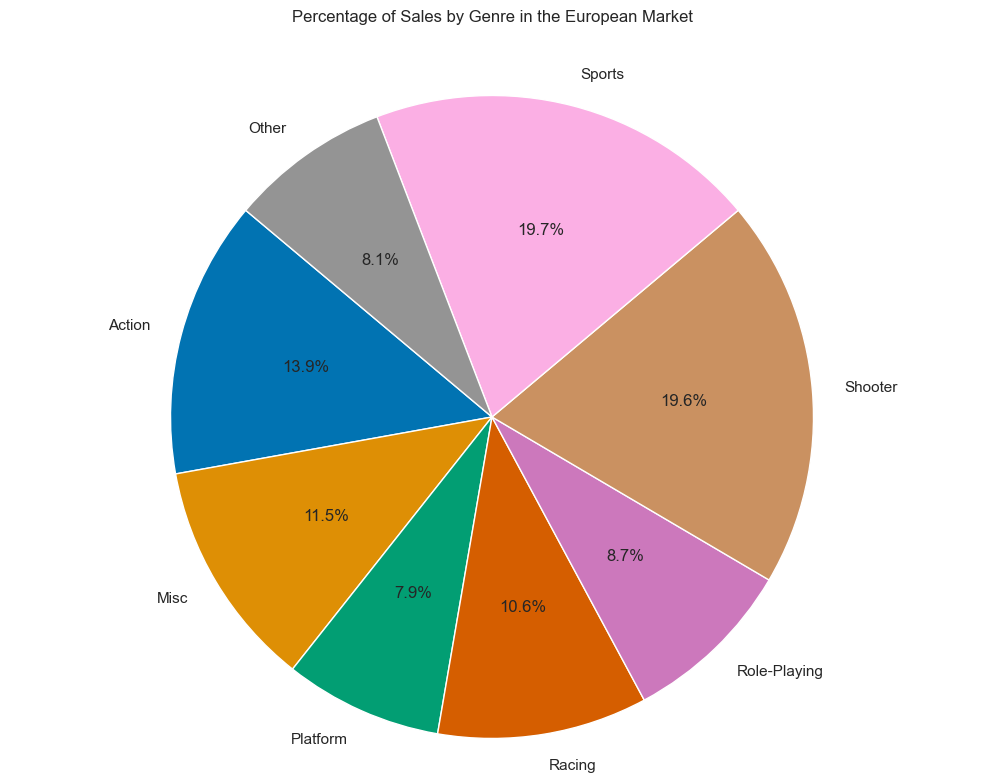

In [7]:
genre_sales_eu = df.groupby('Genre')['EU_Sales'].sum()

threshold = 0.06 * genre_sales_eu.sum()
other_genres = genre_sales_eu[genre_sales_eu < threshold]
other_sales = other_genres.sum()
genre_sales_eu = genre_sales_eu[genre_sales_eu >= threshold]
genre_sales_eu['Other'] = other_sales

colors = sns.color_palette("colorblind")

plt.figure(figsize=(10, 8))
plt.pie(genre_sales_eu, labels=genre_sales_eu.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Sales by Genre in the European Market', loc='center', pad=30)
plt.axis('equal')
plt.tight_layout()

plt.show()

# Explain differences and similarities between the North American and European charts. 

#### The most popular genres in North America are "shooter" (24.8%), "sports" (15.0%), and "action" (13.8%). The most popular genres in Europe are "sports" (19.7%), "shooter" (19.6%), and "action" (13.8%). So both regions have the same genres in the top three, but the order and percentages differ. The three genres in the "other" category are also the same, but again the percentages are different.

# Count of Games by Platform

##### • The bar chart displays the total number of games created for each platform in the dataset.
##### • Each bar represents a platform, and the height of the bar corresponds to the number of games created for that platform.
##### • From the chart, you can observe which platforms have the highest and lowest numbers of games. Platforms with taller bars have more games created for them, while platforms with shorter bars have fewer games.

##### This visualization provides insights into the popularity and prevalence of different gaming platforms within the dataset, helping to identify which platforms are most commonly used for game development.

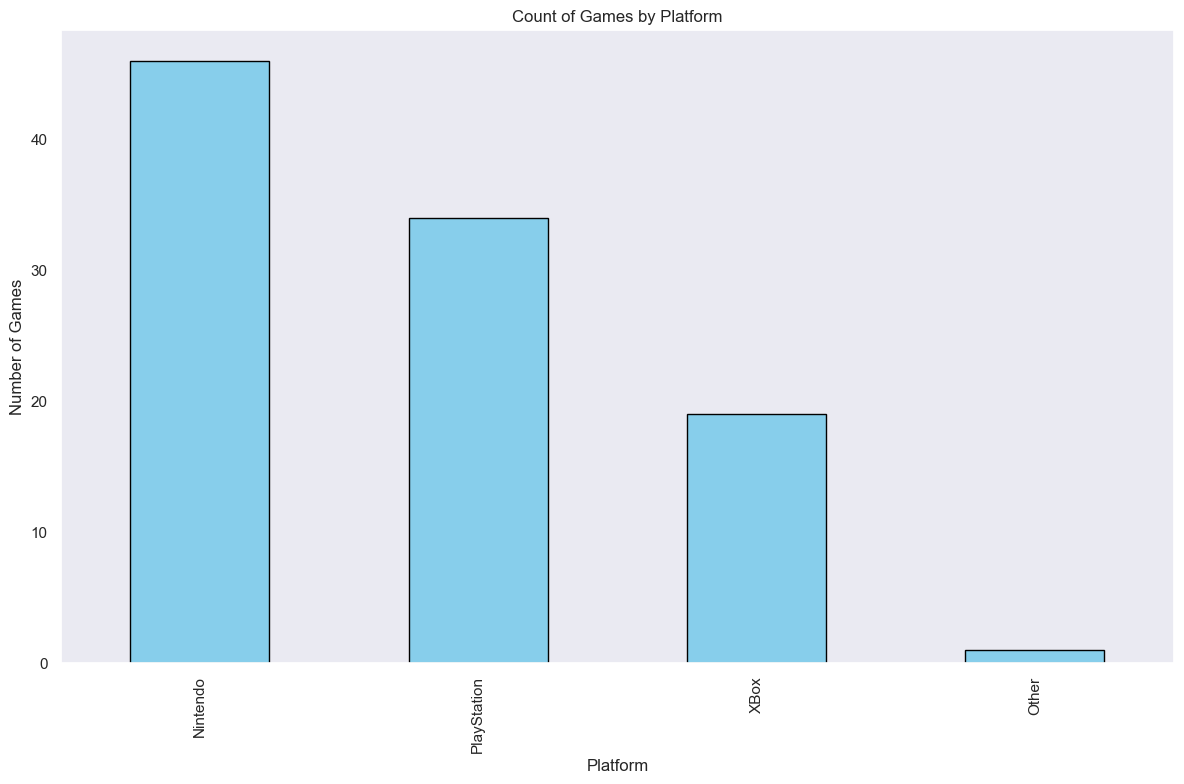

In [8]:
platform_counts = df['Platform'].value_counts()

plt.figure(figsize=(12, 8))
platform_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# EXTRA CREDIT

# Determine the appropriate charts to answer the following questions

#### • What genre of game is present the most in the top 100 games from 2000-2015?
#### • What percentage of global sales does PlayStation have in the dataset?
#### • What is the distribution of sales for Shooter games?

# What genre of game is present the most in the top 100 games from 2000-2015?

##### • The bar chart displays the count of games for each genre in the top 100 games from 2000 to 2015.
##### • Each bar represents a genre, and the height of the bar corresponds to the number of games belonging to that genre.
##### • The genre with the tallest bar indicates the most present genre in the dataset, i.e., the genre of game that appears the most frequently among the top 100 games from 2000 to 2015.
##### • By looking at the chart, you can easily identify which genre dominates the dataset in terms of the count of games.

#### **<u>The genre of game that is present the most in the top 100 games from 2000 to 2015 is: Shooter</u>**

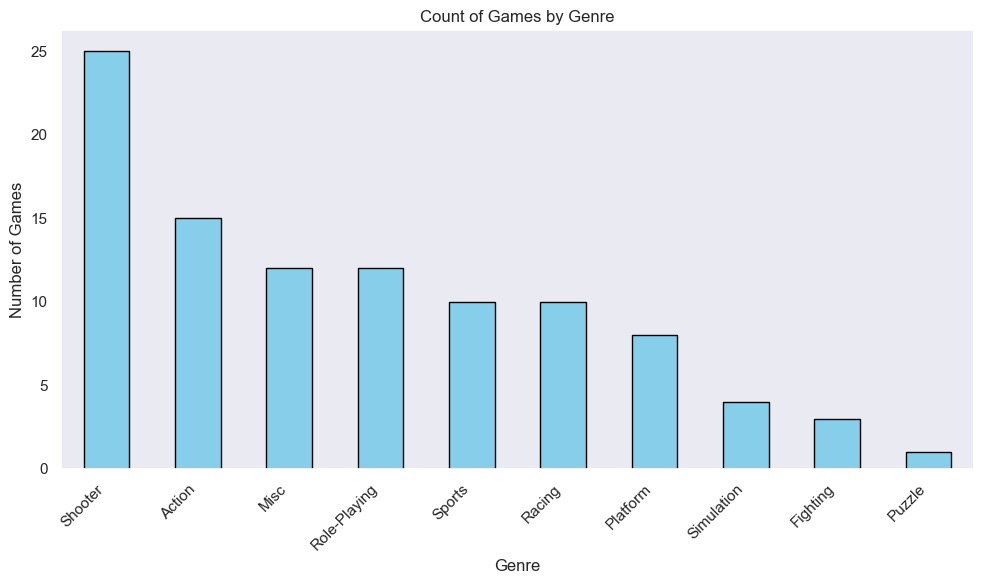

In [9]:
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# What percentage of global sales does PlayStation have in the dataset?
##### • The pie chart represents the percentage of global sales contributed by PlayStation compared to other platforms in the dataset.
##### • The PlayStation slice of the pie represents the percentage of global sales attributed to PlayStation, while the "Other Platforms" slice represents the combined percentage of global sales for all other platforms.
##### • The percentage value displayed on the PlayStation slice indicates the proportion of total global sales that PlayStation contributes to the dataset.
##### • By examining the chart, you can understand the relative contribution of PlayStation to the overall global sales among the top 100 games.

#### **<u>Percentage of global sales for PlayStation: 27.08%</u>**

In [11]:
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum()

playstation_sales = sales_by_platform[['PlayStation']].sum()

total_sales = sales_by_platform.sum()

playstation_percentage = (playstation_sales / total_sales) * 100

print(f"Percentage of global sales for PlayStation: {playstation_percentage:.2f}%")

Percentage of global sales for PlayStation: 27.08%


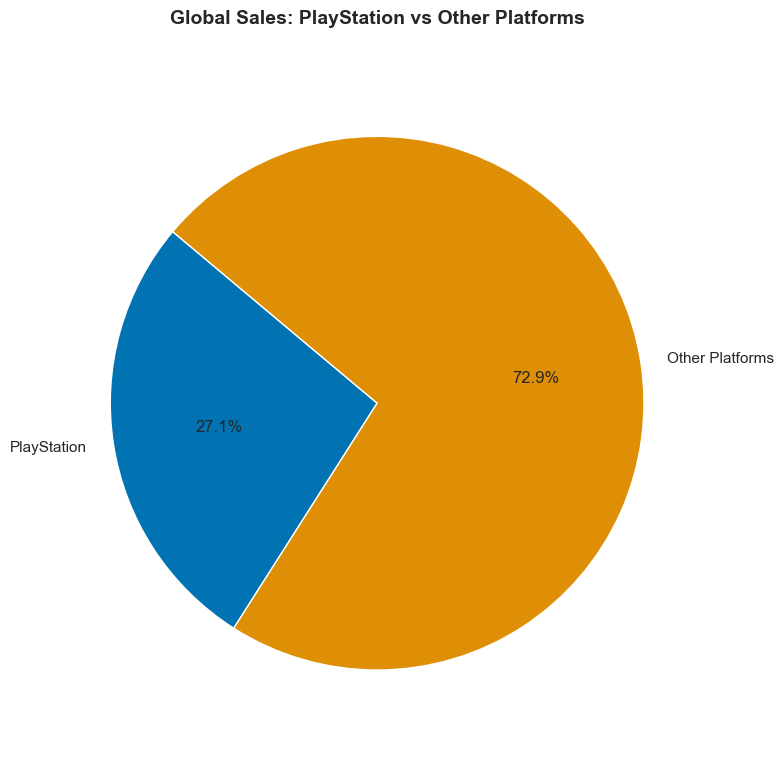

In [13]:
other_platforms_sales = total_sales - playstation_sales
pie_data = [playstation_sales, other_platforms_sales]
labels = ['PlayStation', 'Other Platforms']
colors = sns.color_palette("colorblind")

plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Global Sales: PlayStation vs Other Platforms', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()

plt.show()

# What is the distribution of sales for Shooter games?
##### • The histogram visualizes the distribution of global sales for Shooter games.
##### • Each bar in the histogram represents a range of global sales, and the height of the bar indicates the frequency of Shooter games falling within that range.
##### • By analyzing the histogram, you can gain insights into how sales are distributed across different ranges for Shooter games.
##### • Understanding the distribution of sales helps in assessing the popularity and performance of Shooter games in terms of sales volume.

In [ ]:
shooter_games = df[df['Genre'] == 'Shooter']

plt.figure(figsize=(10, 6))
plt.hist(shooter_games['Global_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales for Shooter Games')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()